# TP 3 - Flower species recognition using Bayesian classification


The aim is to create a Bayesian classifier to classify images of three flower species.

It's important to understand and look for solutions. Using
ChatGPT will produce code, but generally you won't have enough experience to judge that code. And having a solution that works is not the point of this exercise. It's better to *build* a solution, so next time you'll have clues to find a solution on your own. For the project that will be graded, for example.

First, download the flower images :

In [1]:
#!wget -q https://www.irit.fr/~Thomas.Pellegrini/ens/M1CSAA/Fleurs.zip
#!unzip -q Fleurs.zip
#!rm Fleurs.zip

In [2]:
# or get the files from gitlab
!git clone https://gitlab.com/jeromefarinas/m1-ufar.git


fatal: destination path 'm1-ufar' already exists and is not an empty directory.


In [3]:
cd /content/m1-ufar/ScientificComputing/TP/TP3_Bayesian

/content/m1-ufar/ScientificComputing/TP/TP3_Bayesian


Import the necessary modules:

In [4]:
import matplotlib.image as pltimg
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap

import seaborn as sns

from math import pi as PI

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


The next cell displays images of pansies, carnations and chrysanthemums. You'll notice that these images are not all the same size.

./Fleurs/pe1.png
./Fleurs/pe2.png
./Fleurs/pe3.png
./Fleurs/pe4.png
./Fleurs/pe5.png
./Fleurs/pe6.png
./Fleurs/pe7.png
./Fleurs/pe8.png
./Fleurs/pe9.png
./Fleurs/pe10.png


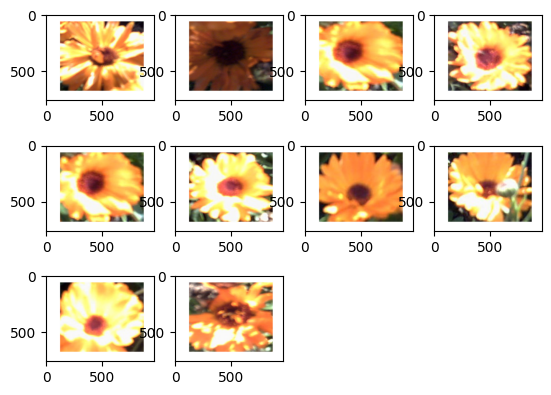

In [5]:
types_flower = ["ch", "oe", "pe"]

def read_image(chemin_fichier):
    return np.array(255*pltimg.imread(chemin_fichier), dtype=int)


def plot_images(type_flower='ch', n_flower=10):
    """Plot images of flowers

    Arguments:
        type_flower='ch', 'oe', 'pe'
        n_flower: number of flowers to be displayed in the figure
    """

    for i in range(n_flower):
        path = "./Fleurs/"
        name = path + type_flower + str(i + 1) + ".png"
        print(name)
        image = read_image(name)
        plt.figure(1)
        plt.subplot(3, 4, i + 1)
        plt.imshow(image)

    plt.show()

plot_images(type_flower='pe', n_flower=10)

In [6]:
a=np.array([[1,0,3],[0,2,3]])
print(np.maximum(1,a))


[[1 1 3]
 [1 2 3]]


## Pre-processing: calculating the average color of an image
First, you will classify the images according to the average color of each flower species. In each pixel of each image, the three color levels $(R,G,B) \in [0,255]^3$ are first transformed into ***normalized*** color levels $(r,g,b)$, which are defined as follows:

\begin{equation*}
	(r,v,b) = \frac{1}{\max\{1,R+V+B\}}\,(R,V,B)
\end{equation*}

The main advantage of normalized color levels is that two values among $(r,g,b)$ allow us to deduce the third, since $r+g+b=1$, except in the exceptional case where $(r,g,b)=(0,0,0)$. An image is therefore characterized by the averages $(\bar{r},\bar{g},\bar{b})$, or more simply by $(\bar{r},\bar{g})$, since $\bar{r}+\bar{g}+\bar{b}=1$, i.e. by a vector $\textbf{x}=[\bar{r},\bar{g}]\in\mathbb{R}^2$, which we call its ***average color***. Given the differences in average color between the three flower species, we assume that this vector will be sufficient to distinguish them.

In the next cell, write the `Preprocessing` function, which calculates the average color of an image.

The `Preprocessing` function is supposed to normalize the colors of an image and calculate the average colors $[\bar{r},\bar{g}]$ in $\mathbb{R}^2$ of the image.

In [7]:

def Pretraitement(img):

    pass

    return r, g

In [8]:
# For testing your function Pretraitement
img = read_image("./Fleurs/oe2.png")
(r,g) = Pretraitement(img);
print(r,g)
# Good answer: 0.45719510295789084 0.3038087794006522

0.45719510295789084 0.3038087794006522


Complete the function `calcule_average_all_images` which returns a dictionary whose keys are the three flower species and whose associated values are a numpy matrix containing the average colors $[\bar{r},\bar{g}]$ of the `n_flowers` of the key species.  


In [9]:

def calcule_average_all_images(n_flowers=10):

    types_flowers = ["ch", "oe", "pe"]
    feat_dic = {"ch":[], "oe": [], "pe": []}

    pass

    return feat_dic



Display the average colors of the set of flower images as three $\mathbb{R}^2$ scatterplots.


In [ ]:
    feat_dic = calcule_average_all_images()
    # print(feat_dic)
    plt.figure()
    plt.plot(feat_dic["ch"][:, 0], feat_dic["ch"][:, 1], "xr", label='ch')
    plt.plot(feat_dic["oe"][:, 0], feat_dic["oe"][:, 1], "ob", label='oe')
    plt.plot(feat_dic["pe"][:, 0], feat_dic["pe"][:, 1], "+g", label='pe')
    plt.legend()
    plt.show()



### Does average color seem to you to be a sufficiently discriminating characteristic of these three flower species?

Answer :

# Classification with sklearn's GaussianNB: the naive Bayesian Gaussian classifier

In [ ]:
def split_data(feat_dic):

    nb_train_flower = 6
    nb_test_flower = 10 - nb_train_flower
    types_flower = ["ch", "oe", "pe"]
    x_train, y_train, x_test, y_test = [], [], [], []
    for t in types_flower:
        x_train.extend(feat_dic[t][0:nb_train_flower])
        y_train.extend([types_flower.index(t)]*nb_train_flower)
        x_test.extend(feat_dic[t][nb_train_flower:])
        y_test.extend([types_flower.index(t)]*nb_test_flower)
    return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test)

In [ ]:
x_train, y_train, x_test, y_test = split_data(feat_dic)

In [ ]:
x_train.shape, y_train, x_test.shape, y_test

Instantiate a GaussianNB classifier and train it on the train subset. Calculate its accuracy on the train and test subsets.

This cell displays the confusion matrix on the test subset.

In [ ]:
y_pred = clf.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

#### Comment on this confusion matrix.

Using the `predict` method, determine the prediction the classifier makes for the last x_test example.

Using the `predict_proba` method, calculate the probabilities of the three classes for the last x_test example.

This cell traces the classifier's decision regions.

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max]

h = 0.02  # step size in the mesh
x_min, x_max = x_train[:, 0].min() - 0.02, x_train[:, 0].max() + 0.02
y_min, y_max = x_train[:, 1].min() - 0.02, x_train[:, 1].max() + 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

plt.contourf(xx, yy, Z, cmap=cmap_light)

target_names = [types_flower[y_train[i]] for i in range(y_train.shape[0]) ]
sns.scatterplot(
    x=x_train[:, 0],
    y=x_train[:, 1],
    hue=target_names,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


Finally, it is possible to retrieve the means and variances of the classifier's Gaussians for each of the three classes:

In [ ]:
print("Means of the Gaussians: \n", clf.theta_)
print("Variances of the Gaussians: \n", clf.var_)

We can see that for each class, there are two variances associated with the two attributes $\bar{r},\bar{v}$. If we used a Gaussian classifier without making the "naive" assumption, we'd have a $2 \times 2$ matrix to characterize the variance.

As seen in class, the naive classifier assumes no interaction between attributes. Attributes are assumed to be independent of each other.

## Your Gaussian classifier

In this part of the tutorial, you'll implement your own Gaussian classifier, without making the naive assumption.

The three previous point clouds will be modeled by two-dimensional normal distributions. Recall that the probability density of a normal distribution is written, in dimension $d$ :

\begin{equation}
	p(\textbf{x})=\cfrac{1}{(2\pi)^{d/2}\,(\det\Sigma)^{1/2}} \,\exp\left\{-\cfrac{1}{2}\,(\textbf{x}-\mu)\Sigma^{-1}(\textbf{x}-\mu)^\top\right\}
\end{equation}

où :

- $\mu$ denotes the expectation (average) of the vectors $\textbf{x}\in\mathbb{R}^d$ : $\mu = E[\textbf{x}]= \int\textbf{x}\,p(\textbf{x})\,d \textbf{x}$.

- $Sigma$ is the variance/covariance matrix: $\Sigma = E[(\textbf{x}-\mu)^T(\textbf{x}-\mu)]$.

In the Bayesian framework, the likelihood of the class $\omega_i$, which is characterized by the mean $\mu_i$ and the variance/covariance matrix $\Sigma_i$, can be modeled by a normal distribution analogous to the last equation:

\begin{equation*}
	p(\textbf{x}|\omega_i) = \frac{1}{(2\pi)^{d/2}\,(\det\Sigma_i)^{1/2}} \,\exp\left\{-\frac{1}{2}\,(\textbf{x}-\mu_i){\Sigma_i}^{-1} (\textbf{x}-\mu_i)^\top\right\} \, \text{, } \quad i\in [1,3]
\end{equation*}

We therefore need to estimate the parameters $\mu_i$ and $\Sigma_i$ for the three classes corresponding to the three flower species.


Complete the `fit()` method of the `GaussianBayes` object:


In [ ]:
class GaussianBayes(object):
    """ Bayesian Gaussian classification
    """
    def __init__(self, priors:np.ndarray=None, nb_train_examples=6) -> None:
        self.priors = priors    # a priori probabilities of classes
                                # (n_classes,)

        self.mu = None          #  mean of each feature per class
                                # (n_classes, n_features)
        self.sigma = None       # covariance of each feature per class
                                # (n_classes, n_features, n_features)

        self.nb_train_examples = nb_train_examples


    def fit(self, X:np.ndarray, y:np.ndarray, ) -> None:
        """Learning : estimate self.mu et self.sigma

        X : shape (n_data, n_features)
        y : shape (n_data)
        """
        pass


    def predict(self, X:np.ndarray) -> np.ndarray:
        """returns a vector of predictions on X containing the indices of the predicted classes

        X shape = [n_samples, n_features]
        maximum log-likelihood
        """
        pass



Instantiate the classifier and train it on the `x_train` subset:

Now complete the `predict` method, initially not using a priori probabilities.


In other words, your classifier makes predictions according to the maximum likelihood rule:

This consists in assigning to $\textbf{x}$ the class $\omega_i$ which maximizes the likelihood $p(\textbf{x}|\omega_i)$.


Make predictions about the train subset and calculate the resulting accuracy

In [ ]:
pred = ?? # to complete

precision = ?? # to complete
print("précision train = %.2f%%"%(precision*100))

pred

Same question about the test subset:

In [ ]:
pred = ??
precision = ??
print("précision test = %.2f%%"%(precision*100))

pred

Is this classifier better or worse than the naive classifier? Why do you think so?

Now let's add the possibility of using a priori class probabilities. To do this, modify the predict method.

As a reminder from the course, Bayes' rule gives the following expression for the ***probability a posteriori*** $p(\omega_i|\textbf{x})$, i.e. the probability that the class $\omega_i$ contains $\textbf{x}$:

\begin{equation}
	p(\omega_i|\textbf{x}) = \frac{p(\textbf{x}|\omega_i)\,p(\omega_i)}{p(\textbf{x})}
\end{equation}

It seems natural to assign to $\textbf{x}$ the class $\omega_i$ that maximizes $p(\omega_i|\textbf{x})$. Such a classification is known as ***maximum a posteriori*** (MAP).

Since the denominator $p(\textbf{x})$ is independent of $\omega_i$, we don't need to know it to find the maximum of $p(\omega_i|\textbf{x})$. On the other hand, it is necessary to know the ***probability a priori*** $p(\omega_i)$ of each class $\omega_i$, failing which it is generally assumed that the classes are equiprobable (the maximum a posteriori estimator then amounts to a maximum likelihood estimator).


By playing with the a priori probabilities of the three classes, you'll try to maximize the percentage of images correctly classified.

## Improving the classifier

Even when playing with a priori probabilities, the resulting classifier remains disappointing. Careful observation of the images of pansies and carnations, whose mean colors are similar, shows that these two flower species are not structured in the same way: pansies are darker in the center, i.e. at the pistil. This suggests not only calculating the average color of the images, but also splitting each image into two complementary parts: the center $C$ (a notion yet to be defined) and the periphery $P$ (complementary to $C$).

Write a new `GaussianBayesBetter` class based on the principle of the previous MAP classifier, but using three features to describe an image, namely the pair of $(\bar{r},\bar{v})$ values calculated on the $P$ perimeter and the $\bar{r}$ value calculated on the $C$ center.